In [1]:
import pandas as pd

In [2]:
imported_data = pd.read_excel('./Activity_Recognition_DataSet/Arm.xlsx')

In [3]:
imported_data

,Time_Stamp,Ax,Ay,Az,Gx,Gy,Gz,Mx,My,Mz,Activity_Label
0,1364396345335,-17.365944,19.517958,0.885323,-0.121868,2.177429,1.535715,18.300000,-44.160000,8.639999,Downstairs
1,1364396345354,-9.684067,13.933616,1.157730,-0.053145,-1.751656,1.254106,17.279999,-44.160000,9.179999,Downstairs
2,1364396345375,-4.045243,7.709117,-1.266692,-0.596510,-3.471852,1.176526,16.500000,-44.399998,9.360000,Downstairs
3,1364396345394,-1.770645,5.788648,-0.735499,-0.867734,-2.983771,0.893696,15.900000,-44.520000,9.360000,Downstairs
4,1364396345414,2.819412,3.963521,0.599295,-0.541227,-2.662762,0.328645,15.000000,-44.700000,9.240000,Downstairs
...,...,...,...,...,...,...,...,...,...,...,...
160650,1364303049447,0.449471,9.942854,2.574246,0.464868,-1.096809,-0.822836,6.720000,-47.039997,4.620000,Walking
160651,1364303049467,0.572055,9.071152,2.451662,0.533896,-0.831082,-0.904691,7.020000,-46.920000,4.740000,Walking
160652,1364303049489,0.572055,7.150682,2.056673,0.470672,-0.698219,-0.919963,7.500000,-46.800000,5.040000,Walking
160653,1364303049509,0.313268,6.360703,1.947710,0.343612,-0.676228,-0.872316,7.740000,-46.739998,4.920000,Walking


In [4]:
n_minimum_samples = imported_data.groupby('Activity_Label').count().min()[0]

In [5]:
n_training_samples = 2/3 * n_minimum_samples

In [6]:
training_data = imported_data.groupby('Activity_Label').head(n_training_samples)

In [7]:
training_data.count()[0]

73812

In [8]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(training_data.Activity_Label)
training_data['Activity_Label'] = le.transform(training_data.Activity_Label)
# re process le.inverse_transform(df['categorical_label'])

/var/folders/zw/nhh2j6mn1b582ymy17q7nq2m0000gn/T/ipykernel_12270/1289649001.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['Activity_Label'] = le.transform(training_data.Activity_Label)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_data[['Ax', 'Ay', 'Az', 'Gx' ,'Gy', 'Gz', 'Mx', 'My', 'Mz']], training_data['Activity_Label'], test_size=0.5, random_state=0)

In [72]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7034086598385086

In [107]:
from sklearn import tree
from sklearn.metrics import accuracy_score
decisionTree = tree.DecisionTreeClassifier(max_depth=20)
decisionTree = decisionTree.fit(X_train, y_train,)
y_pred = decisionTree.predict(X_test)
accuracy = (1-(y_test != y_pred).sum()/X_test.shape[0])*100
accuracy = ((y_test == y_pred).sum()/y_test.count())*100
accuracy_score(y_test, y_pred)

0.9022381184631225

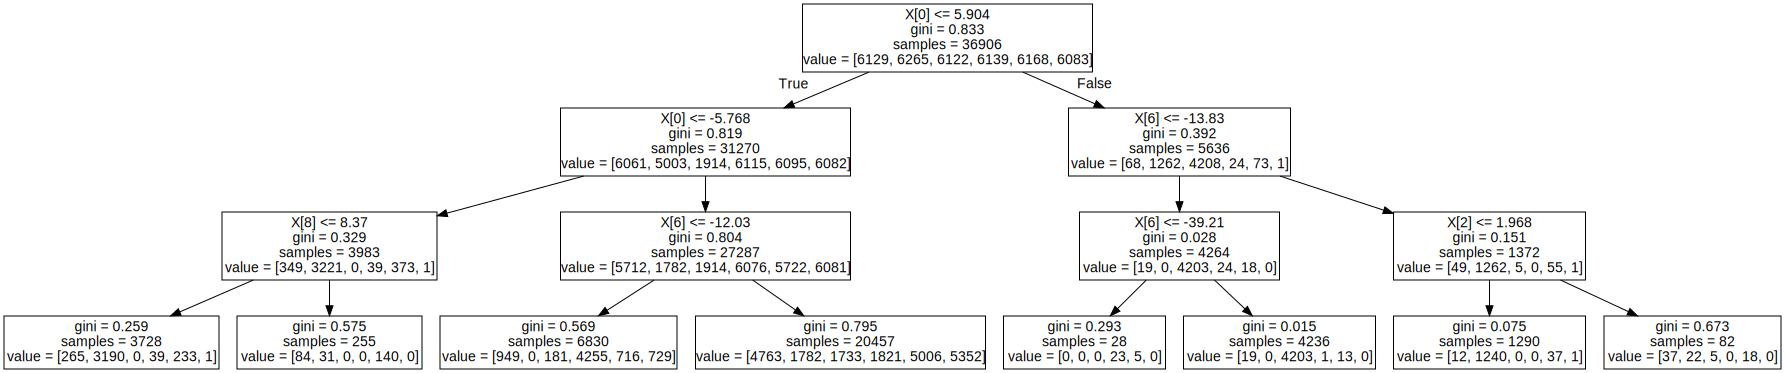

In [101]:
#tree.export_text(decisionTree)
from IPython.display import display
import graphviz
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,export_graphviz

display(graphviz.Source(export_graphviz(decisionTree)))

In [50]:
imported_data['Activity_Label'].unique()

array(['Downstairs', 'Running', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)